In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [3]:
# Load the breast cancer dataset
data = load_breast_cancer()
print(data['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [4]:
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

# Create a DataFrame for better data visualization
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# Display basic information about the dataset
print(f"Dataset shape: {df.shape}")
print(f"Number of samples: {len(df)}")
print(f"Number of features: {len(feature_names)}")
print(f"Classes: {target_names}")
print(f"Class distribution: {np.bincount(y)}")

Dataset shape: (569, 31)
Number of samples: 569
Number of features: 30
Classes: ['malignant' 'benign']
Class distribution: [212 357]


In [5]:
# View the first few rows of the dataset
print("\nSample data:")
print(df.head(2))
print("==============================================================================================")

# Basic statistics
print("\nBasic statistics:")
print(df.describe())
print("==============================================================================================")

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum().sum())
print("==============================================================================================")


Sample data:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38           122.8     1001.0          0.11840   
1        20.57         17.77           132.9     1326.0          0.08474   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33            184.6      2019.0   
1                 0.05667  ...          23.41            158.8      1956.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   

   worst symmetry  worst fractal dimension  target  

In [6]:
# Data Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(f"The shape of X_scaled: {X_scaled.shape}")

# Split the original dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train a Random Forest on the original dataset
rf_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_pca.fit(X_train, y_train)

# Make predictions
y_pred = rf_pca.predict(X_test)

# Evaluate the model
print("\nRandom Forest on original data:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

The shape of X_scaled: (569, 30)

Random Forest on original data:
Accuracy: 0.9708

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



In [7]:
# Step 1: Data Standardization
# StandardScaler normalizes features to have mean=0 and std=1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Transform all features to standard scale

# Step 2: Principal Component Analysis (PCA)
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_scaled)
print(f"The shape of X_pca_2: {X_pca_2.shape}")

# Step 3: Train-Test Split
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_pca_2, y, test_size=0.3, random_state=42)

# Step 4: Model Training
rf_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_pca.fit(X_train_2, y_train_2)

# Step 5: Model Prediction and Evaluation
y_pred_2 = rf_pca.predict(X_test_2)

# Step 6: Performance Evaluation
print("\nRandom Forest on PCA-reduced data:")
print(f"Accuracy: {accuracy_score(y_test_2, y_pred_2):.4f}")
print("\nClassification Report:")
print(classification_report(y_test_2, y_pred_2))

The shape of X_pca_2: (569, 2)

Random Forest on PCA-reduced data:
Accuracy: 0.9532

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        63
           1       0.96      0.96      0.96       108

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



In [8]:
n_components = 2

# 1. Standardize the data
# scaler = StandardScaler()
X_std = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# 2. Calculate the covariance matrix
cov_matrix = np.cov(X_std.T)
# print(cov_matrix.shape) # (30, 30)

# 3. Calculate the eigenvalues and eigenvectors of the covariance matrix
# Formulation: Ax = λx
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
# print(eigenvalues.shape) # (30,)
# print(eigenvectors.shape) # (30, 30)

# 4. Sort eigenvectors by decreasing eigenvalues
# Create pairs of (eigenvalue, eigenvector) and sort by eigenvalue
eigen_pairs = [(np.abs(eigenvalues[i]), eigenvectors[:, i]) for i in range(len(eigenvalues))]
eigen_pairs.sort(key=lambda x: x[0], reverse=True)

# Extract the eigenvectors into a matrix W
W = np.column_stack([eigen_pairs[i][1] for i in range(n_components)])
# print(W.shape) # (30, 2)

# 6. Transform the data
X_pca = X_std.dot(W)

is_equal = np.allclose(X_pca, X_pca_2, rtol=1e-5, atol=1e-8)
print(is_equal)

True


# Appendix

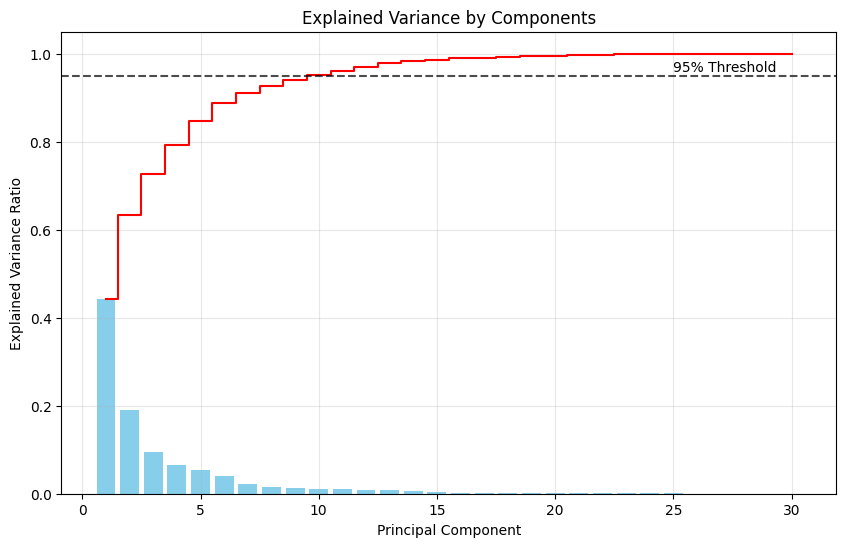

In [9]:
import matplotlib.pyplot as plt

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate variance explained by each principal component
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=1.0, color='skyblue')
plt.step(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, where='mid', color='red')

plt.title('Explained Variance by Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')

plt.axhline(y=0.95, color='k', linestyle='--', alpha=0.7)
plt.text(25, 0.96, '95% Threshold', fontsize=10)
plt.grid(True, alpha=0.3)
plt.show()

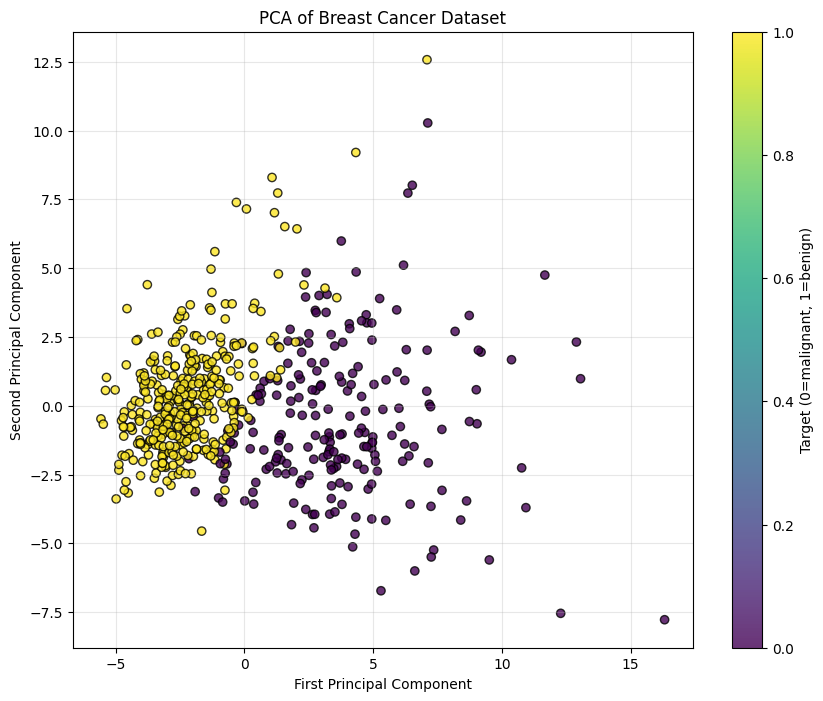

In [10]:
# Visualize the first two principal components
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca_2[:, 0], X_pca_2[:, 1], c=y, cmap='viridis', edgecolor='k', alpha=0.8)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Breast Cancer Dataset')
plt.colorbar(scatter, label='Target (0=malignant, 1=benign)')
plt.grid(True, alpha=0.3)
plt.show()